# RNN for 3D sine generation

## Build network with Keras

In [124]:
import math
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

def plot(dataset):
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset[0:, 0], dataset[0:, 1], dataset[0:, 2])
    plt.show()

## Create sample data

In [125]:
dataset = [[0, 2, 0]]
x = 0
steps = 100
for i in range(1, steps * 64):
    x += math.pi / steps / 4
    dataset.append([x, 2, math.sin(x)])
dataset = np.array(dataset)
print("-------------------")
print(len(dataset))

-------------------
6400


In [144]:
print(dataset)

[[ 0.00000000e+00  2.00000000e+00  0.00000000e+00]
 [ 7.85398163e-03  2.00000000e+00  7.85390089e-03]
 [ 1.57079633e-02  2.00000000e+00  1.57073173e-02]
 ...
 [ 5.02419205e+01  2.00000000e+00 -2.35597648e-02]
 [ 5.02497745e+01  2.00000000e+00 -1.57073173e-02]
 [ 5.02576285e+01  2.00000000e+00 -7.85390089e-03]]


### Plot data

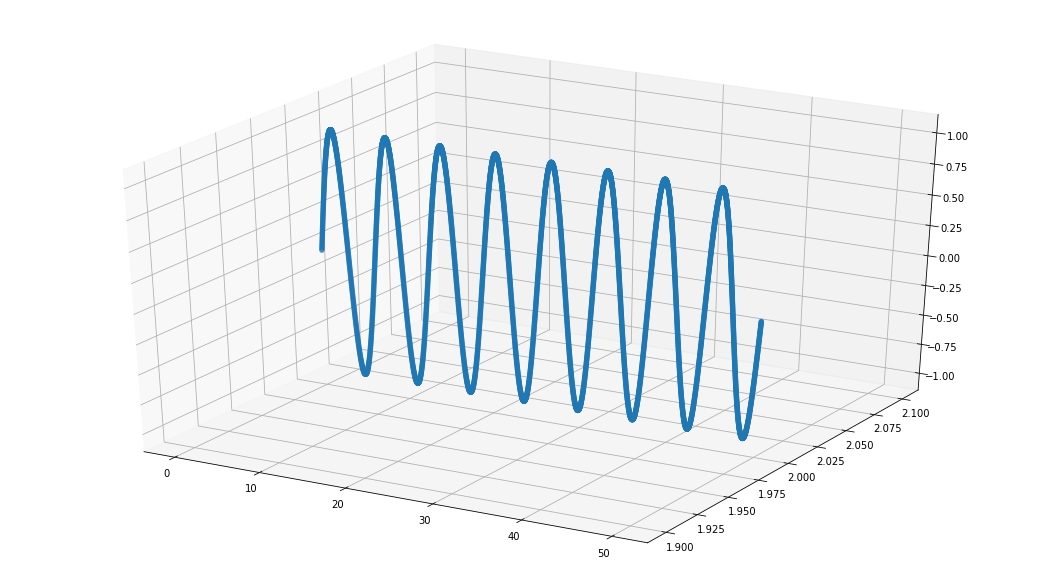

In [126]:
plot(dataset)

In [127]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("-------------------")
print(len(train), len(test))

-------------------
4288 2112


In [139]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [140]:
# reshape input to be [samples, time steps, features]
print(trainX)

trainX = np.reshape(trainX, (trainX.shape[0], 3, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 3, testX.shape[1]))

print(trainX)

[[[0.00000000e+00 2.00000000e+00 0.00000000e+00]]

 [[7.85398163e-03 2.00000000e+00 7.85390089e-03]]

 [[1.57079633e-02 2.00000000e+00 1.57073173e-02]]

 ...

 [[3.36386033e+01 2.00000000e+00 7.94944353e-01]]

 [[3.36464573e+01 2.00000000e+00 7.90155012e-01]]

 [[3.36543113e+01 2.00000000e+00 7.85316931e-01]]]
[[[0.00000000e+00]
  [2.00000000e+00]
  [0.00000000e+00]]

 [[7.85398163e-03]
  [2.00000000e+00]
  [7.85390089e-03]]

 [[1.57079633e-02]
  [2.00000000e+00]
  [1.57073173e-02]]

 ...

 [[3.36386033e+01]
  [2.00000000e+00]
  [7.94944353e-01]]

 [[3.36464573e+01]
  [2.00000000e+00]
  [7.90155012e-01]]

 [[3.36543113e+01]
  [2.00000000e+00]
  [7.85316931e-01]]]


## Training

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [102]:
model = keras.Sequential()
model.add(layers.LSTM(4, input_shape=(3, look_back)))
model.add(layers.Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

def train_predict_plot():
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2)

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    plot(trainPredict)

4286/4286 - 17s - loss: 50.3035


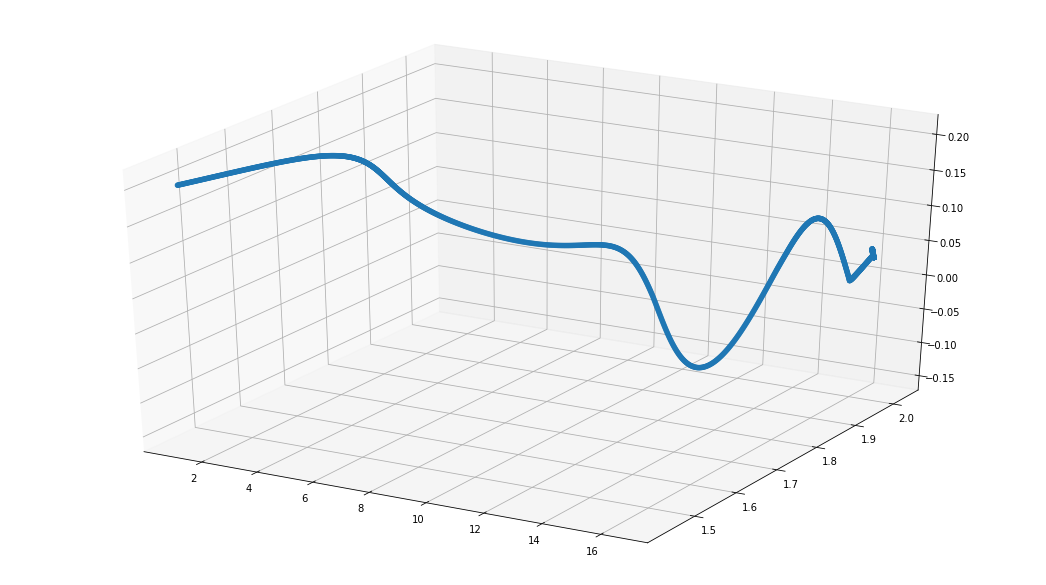

In [103]:
train_predict_plot()

4286/4286 - 16s - loss: 7.7488


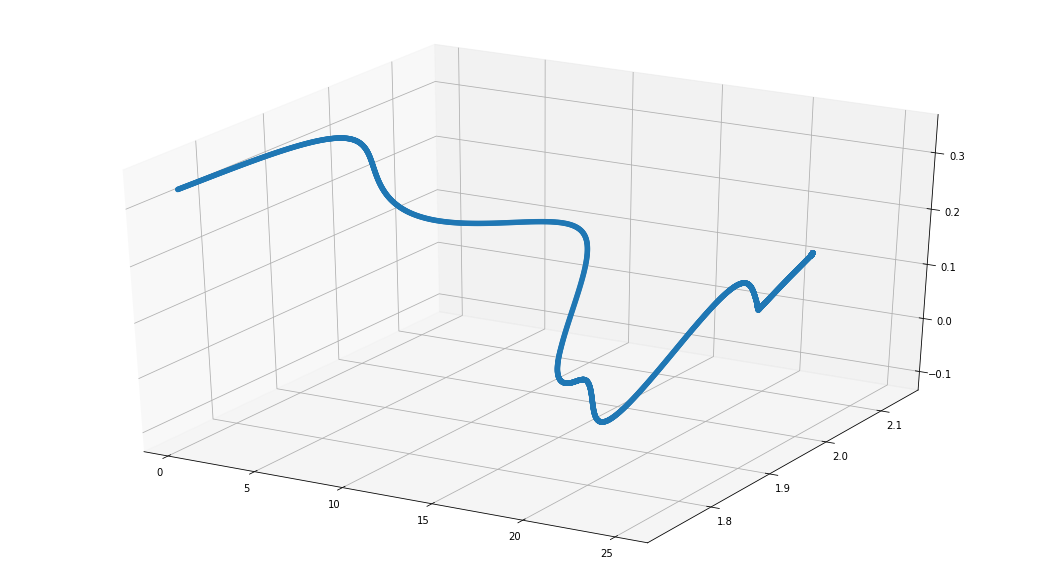

In [104]:
train_predict_plot()

4286/4286 - 17s - loss: 1.0762


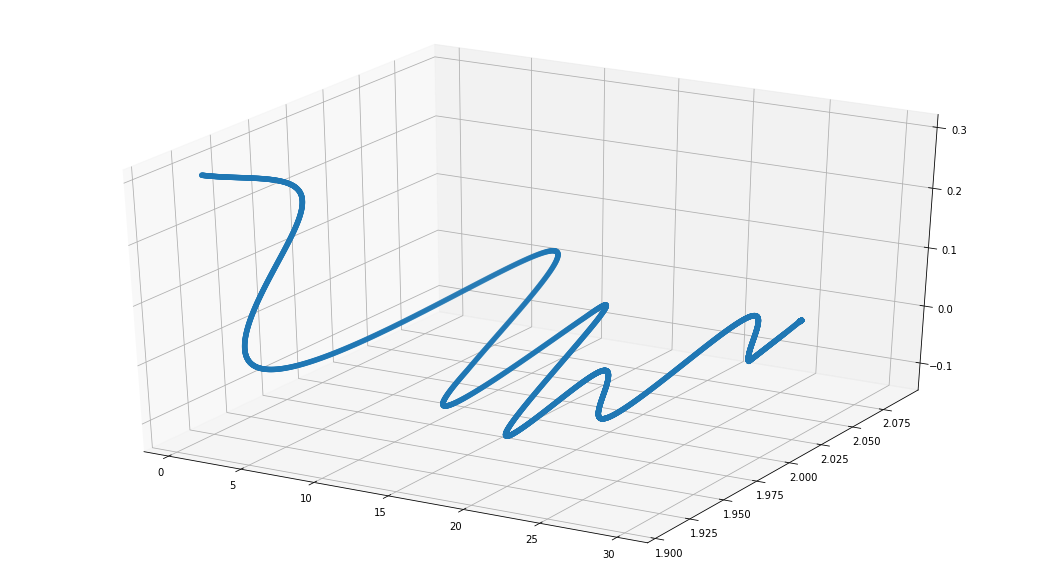

In [105]:
train_predict_plot()

4286/4286 - 16s - loss: 0.2668


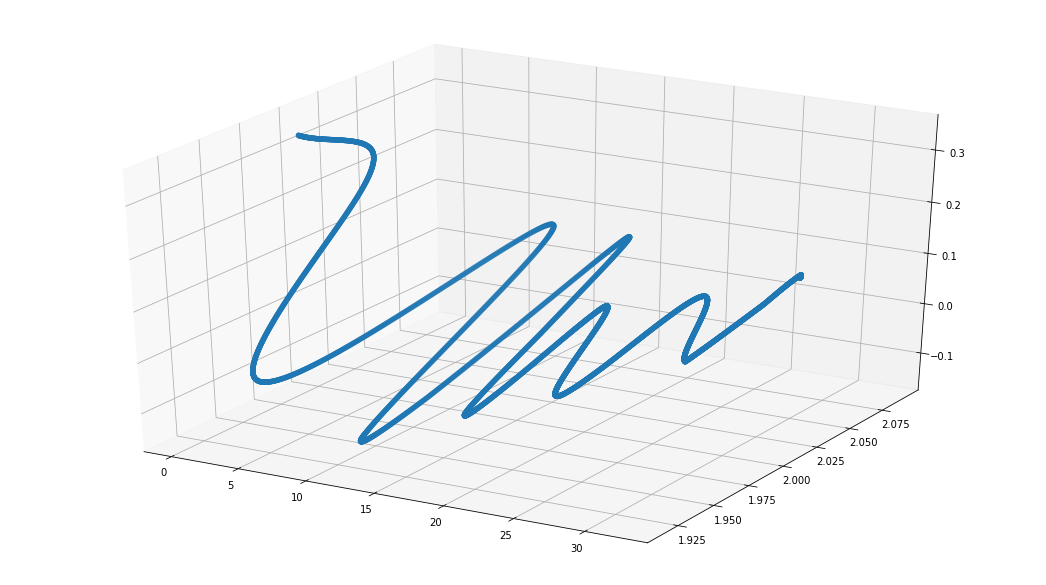

In [106]:
train_predict_plot()

4286/4286 - 16s - loss: 0.1703


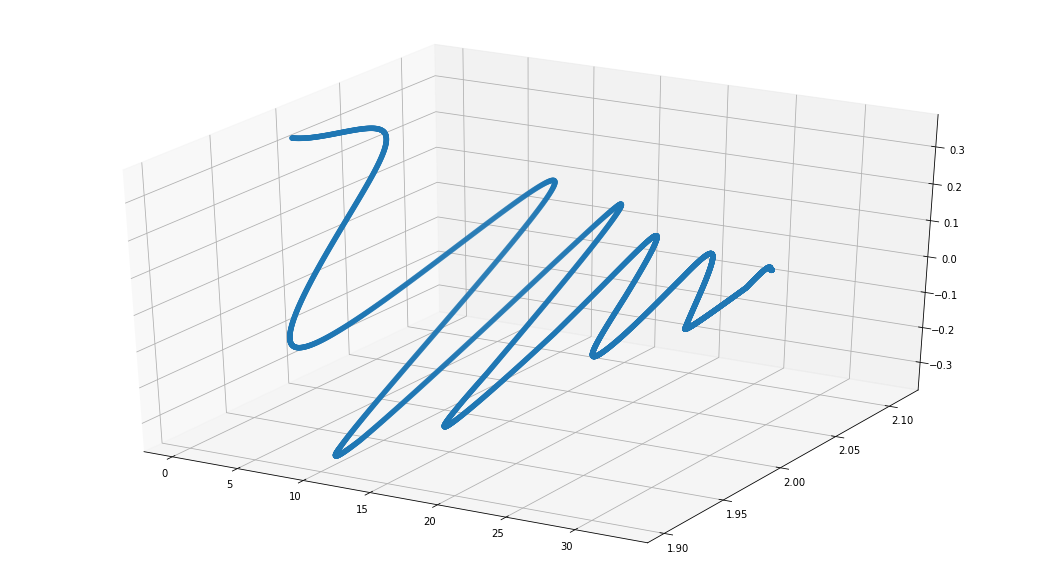

In [107]:
train_predict_plot()

4286/4286 - 16s - loss: 0.1455


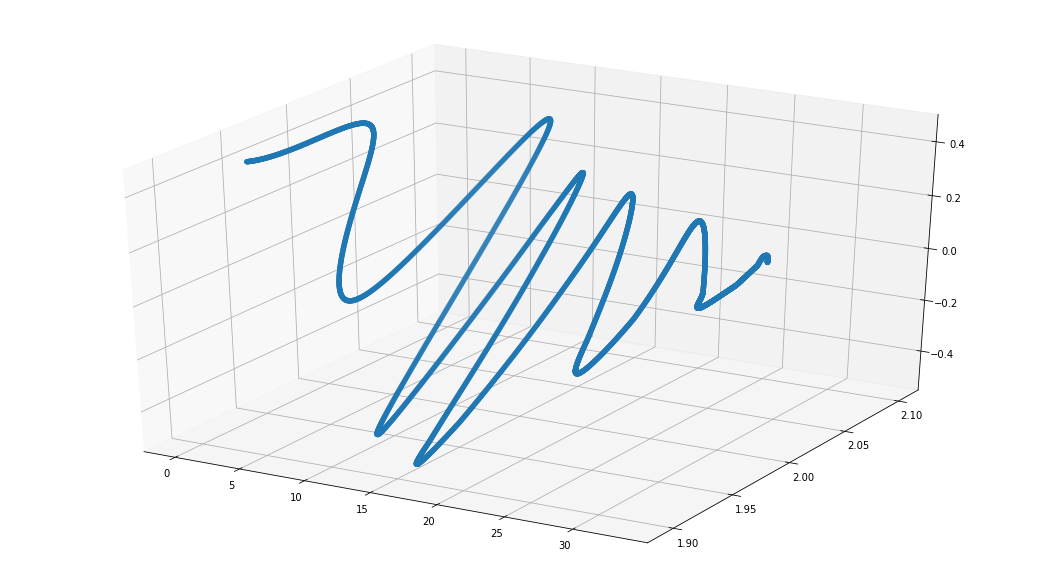

In [108]:
train_predict_plot()

4286/4286 - 16s - loss: 0.1057


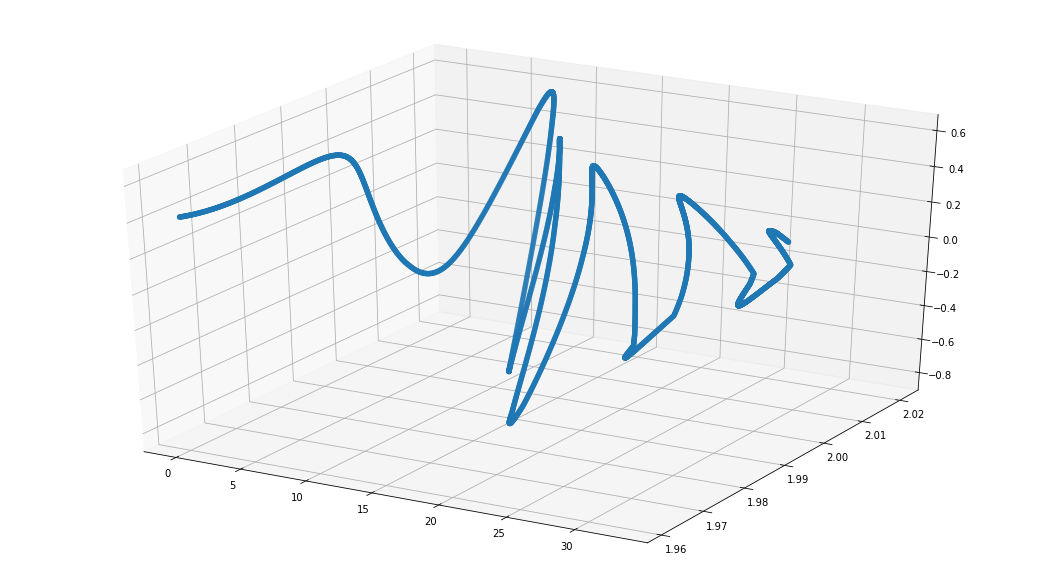

In [109]:
train_predict_plot()

4286/4286 - 17s - loss: 0.0742


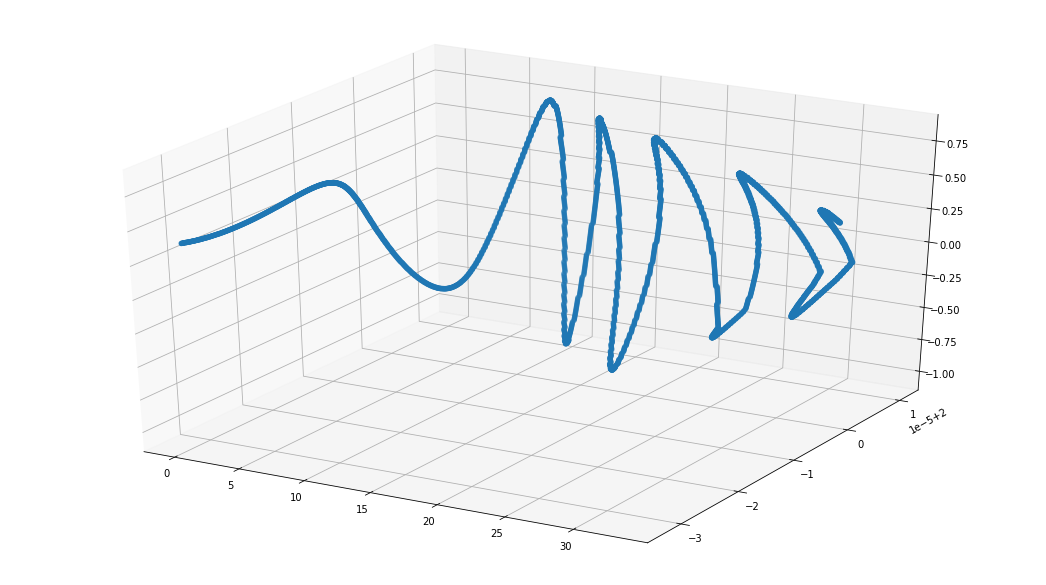

In [110]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0570


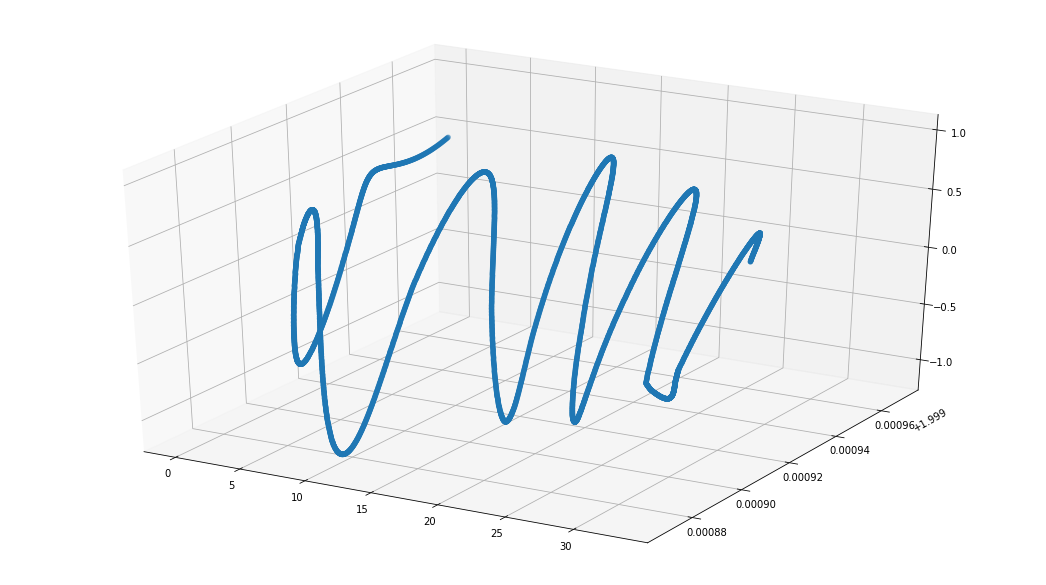

In [111]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0437


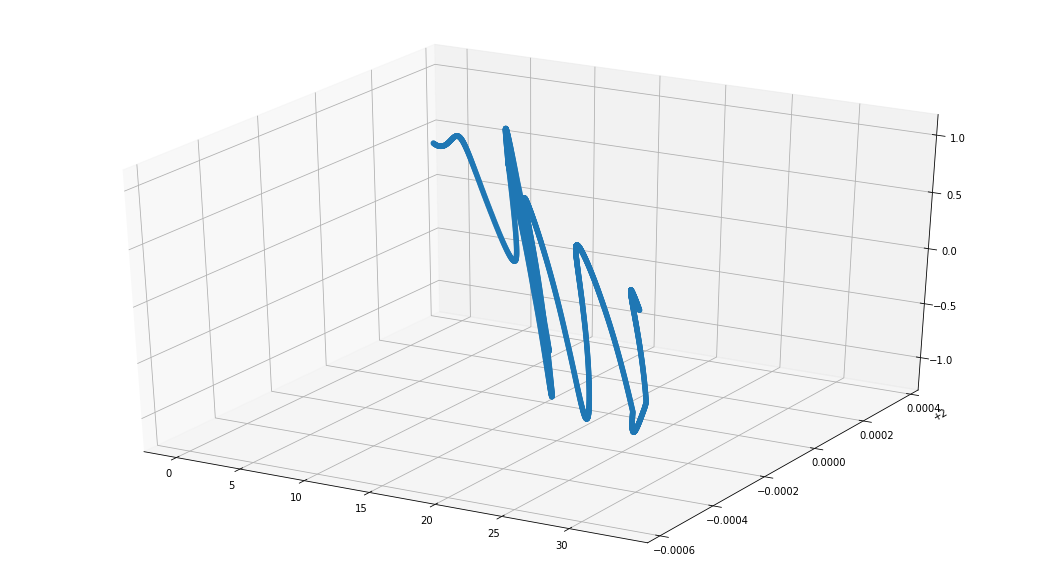

In [112]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0344


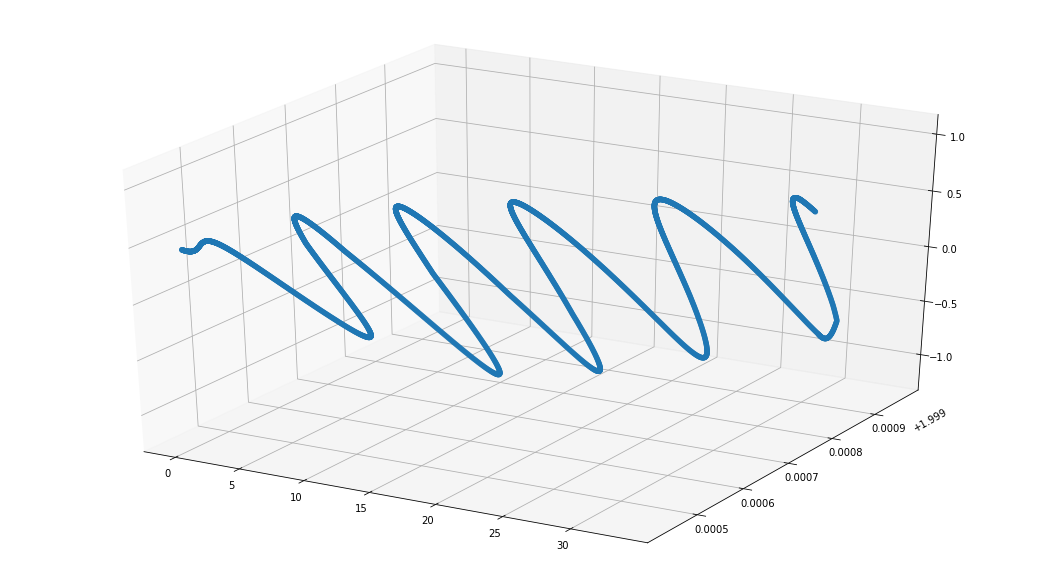

In [113]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0300


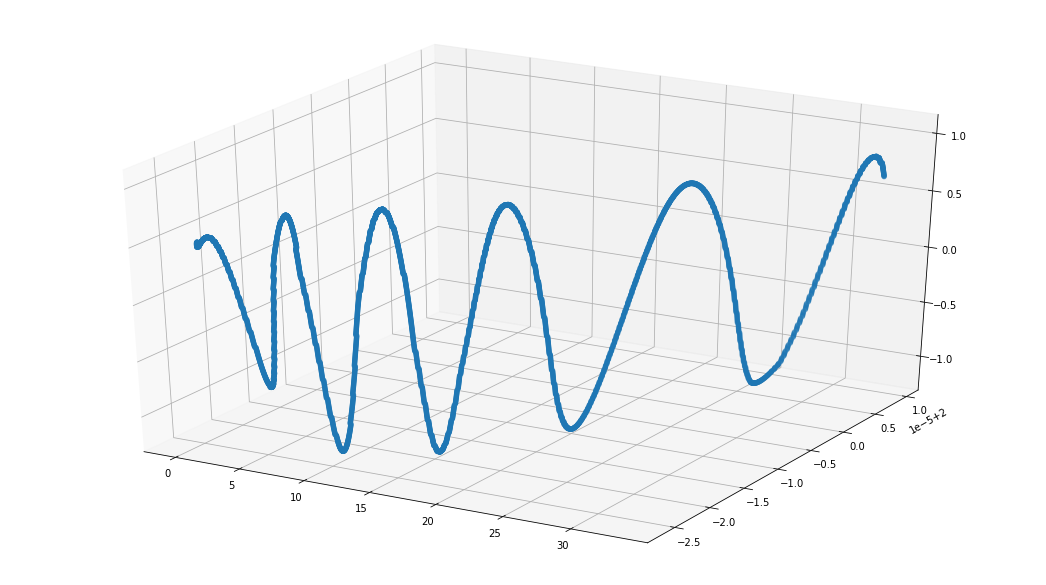

In [114]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0222


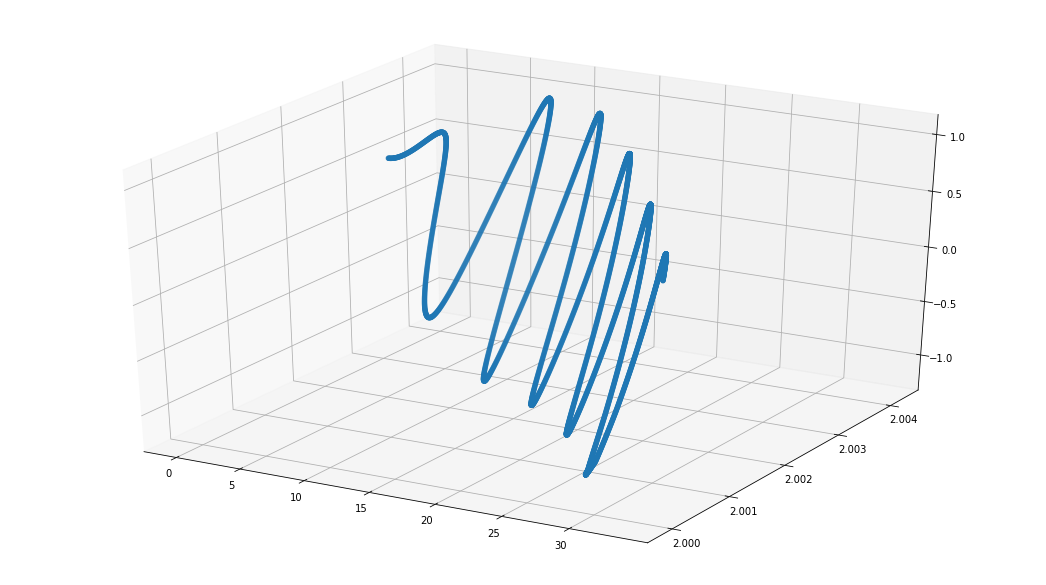

In [115]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0198


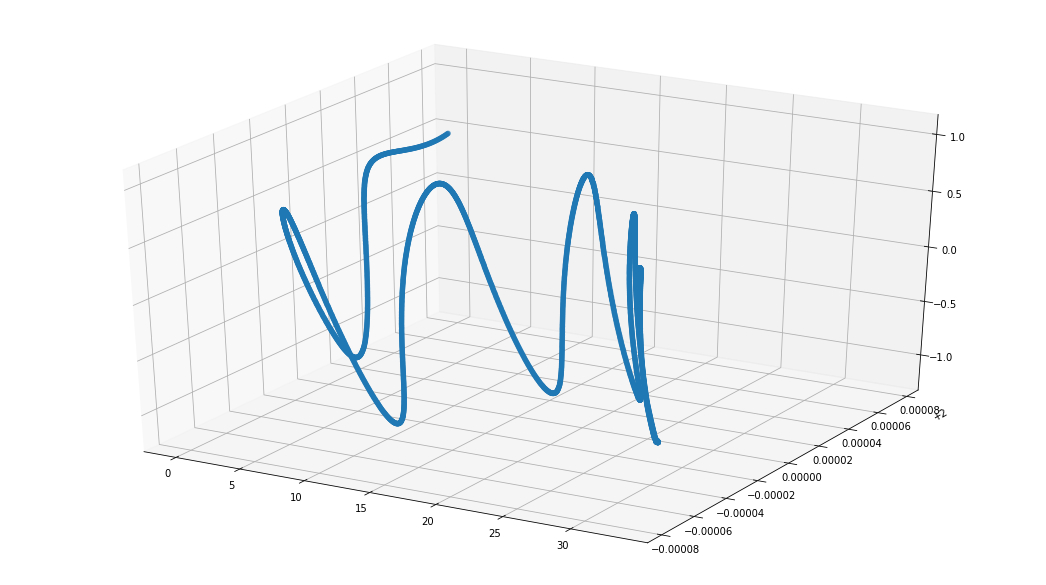

In [116]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0175


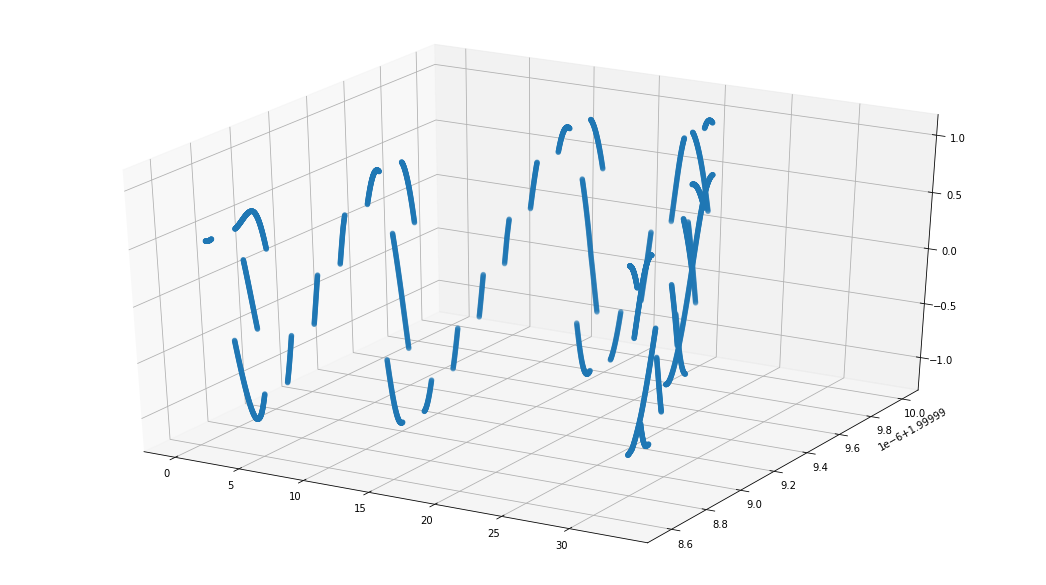

In [117]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0152


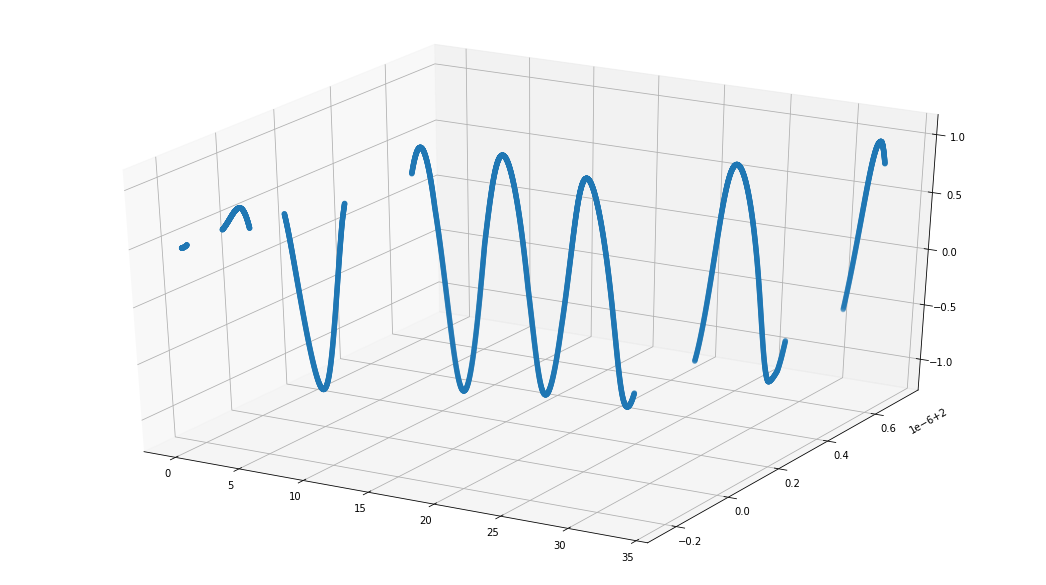

In [118]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0133


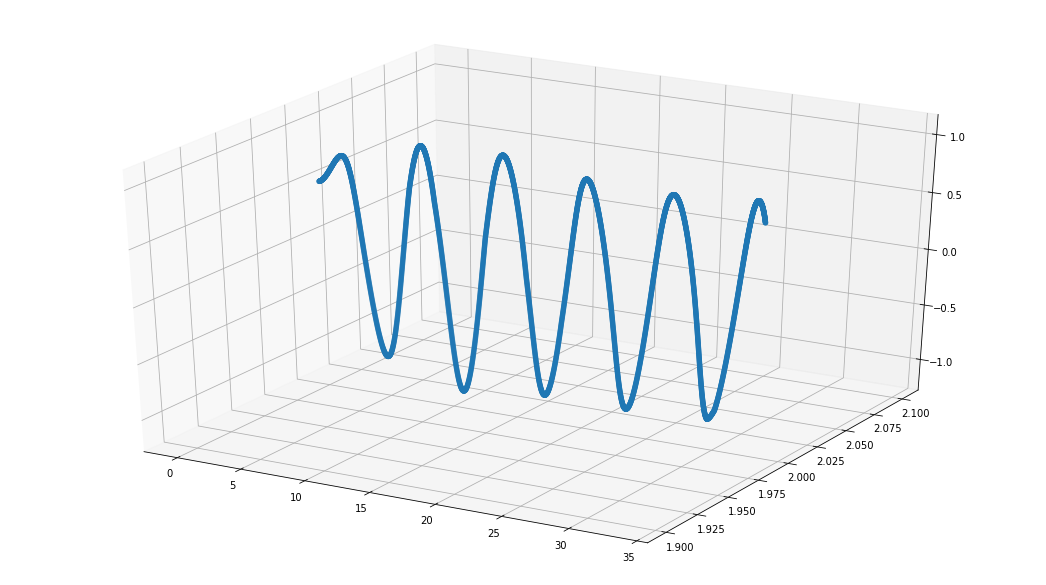

In [119]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0122


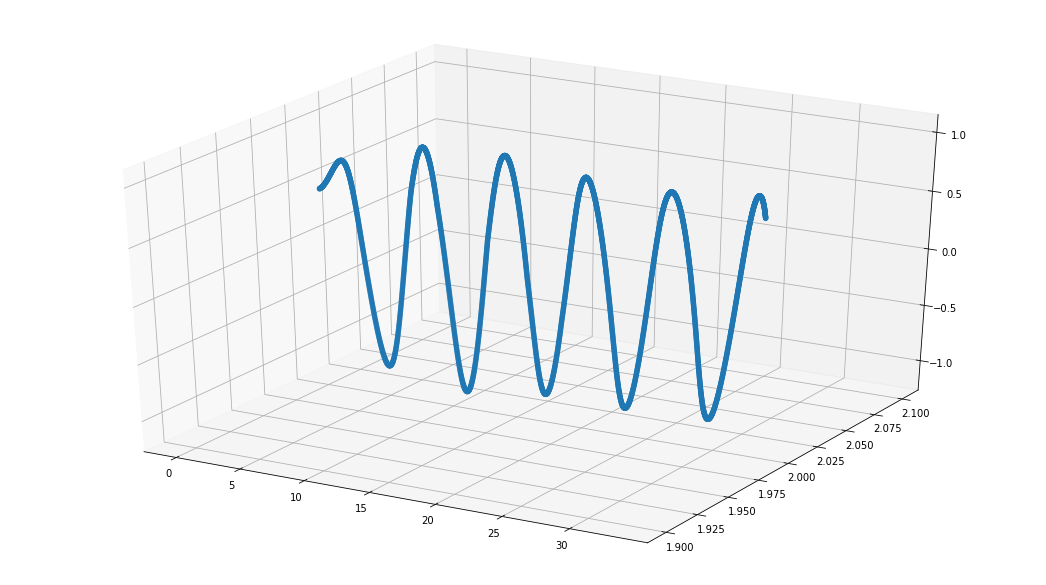

In [120]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0115


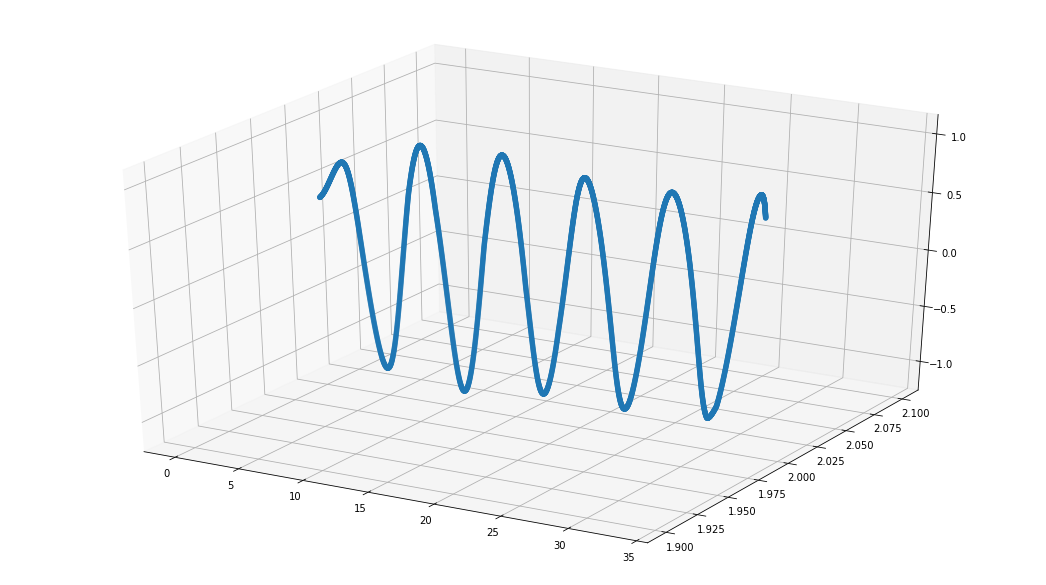

In [121]:
train_predict_plot()

4286/4286 - 16s - loss: 0.0110


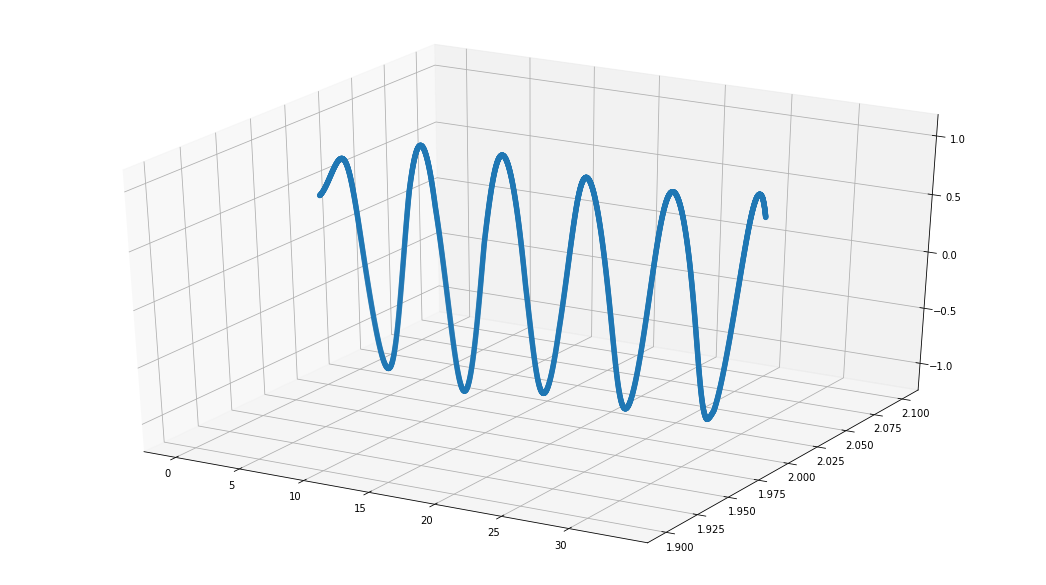

In [122]:
train_predict_plot()